In [1]:
import uproot
import numpy as np
from matplotlib import pyplot as plt

from os import path

In [2]:
#Open double ROOT file 
file_path = "/Users/bertabeltran/mist/data/efficiency_test/new_efficiency_sec2_double/RAW/SDataR_new_efficiency_sec2_double.root"
#file_path ="/Users/bertabeltran/mist/data/efficiency_test/sec5_double_eff_test_spectra_waves/RAW/DataR_sec5_double_eff_test_spectra_waves.root"
file=uproot.open(file_path)
tree=file["Data_R"]
print(tree.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps = tree["Timestamp"].array(library = "np") # picoseconds
channel = tree["Channel"].array(library = "np")
energy = tree["Energy"].array(library = "np")
flags = tree["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags', 'Probe', 'Samples']


In [3]:
#Create masks for channels
CH0_mask = channel == 0
CH1_mask = channel == 1

#Get timestamps for each channel (time in picoseconds from the begining of the run)
CH0_timestamps = timestamps[CH0_mask]
CH1_timestamps = timestamps[CH1_mask]


#Calculate energy of events on each channel
CH0_energy = energy[CH0_mask]
CH1_energy = energy[CH1_mask]

#calcuate the time difference between events in chn 0
CH0_time_diff = np.diff(CH0_timestamps)
CH0_time_diff=CH0_time_diff/1e+12 #make it seconds 

In [4]:
len(CH0_timestamps)

6160

In [5]:
len(CH1_timestamps)

6160

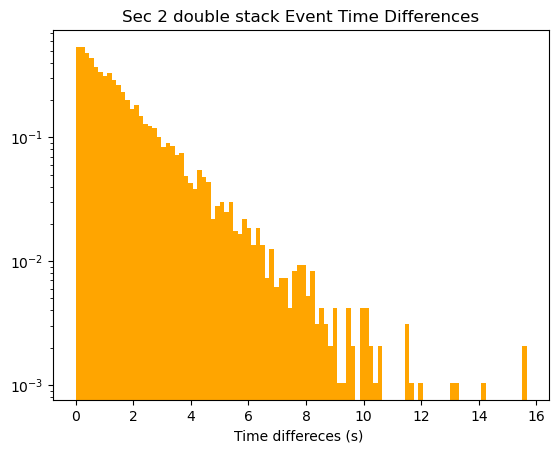

In [6]:
# plot the time differences distribution to see if it looks right 

plt.hist(CH0_time_diff, bins = 100, histtype='stepfilled' ,density=True,color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax=plt.gca()
ax.set_title("Sec 2 double stack Event Time Differences")
ax.set_xlabel("Time differeces (s) ")
plt.yscale('log')


plt.show()


Expo function coefficients:
[ 6.3504612  -0.59194544]
Covariance of coefficients:
[[ 7.42372145e-05 -4.40068098e-05]
 [-4.40068098e-05  5.19446902e-05]]


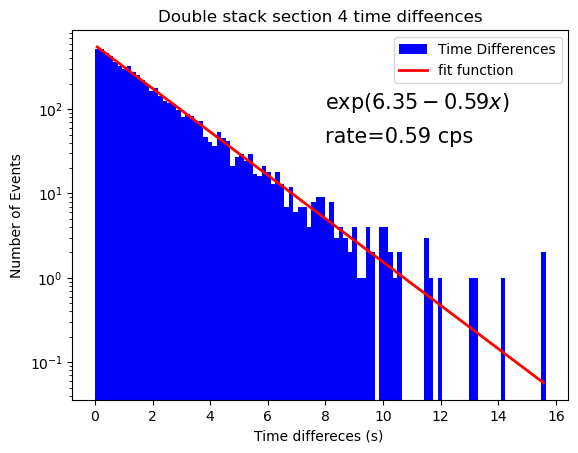

In [7]:
# now I am going to try and fit the time differences plot with curve_fit

import numpy as np
from scipy.optimize import curve_fit
#firts I define the exponential fucntion that I will be fitting 
def expo(x, a, b):
    return  np.exp(a+(b*x))

#here I caculate the bin centers for the fit               
def bincenters(bins):
    return (bins[1:] + bins[:-1]) / 2
                   
# define the histogram that I will be fitting to and return the bin contents and the bid edeges    
bin_cont, bin_edges, patches = plt.hist(CH0_time_diff, bins = 100,histtype='stepfilled' , color ='blue',label ="Time Differences")
                   
# here I do the fit a return the fit values     
param, param_cov = curve_fit(expo, bincenters(bin_edges),bin_cont)
                   
# print the values     
print("Expo function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# now I also want to draw the fitted function on top of the histogram 
fit_func= expo(bincenters(bin_edges),param[0] ,param[1] )
plt.plot(bincenters(bin_edges), fit_func, 'red', linewidth=2, label ="fit function ")       

fit_eq= r"exp$({:.2f} {:.2f}x)$".format(param[0] ,param[1])

ax=plt.gca()
ax.text(8, 100, fit_eq, fontsize=15)
ax.text(8, 40, "rate={:.2f} cps".format(abs(param[1])), fontsize=15)

plt.legend()
plt.yscale('log')
ax.set_title("Double stack section 4 time diffeences")
ax.set_xlabel("Time differeces (s) ")
ax.set_ylabel('Number of Events')
plt.show()

In [8]:
# caculate the event rate for chan 0 by looking at the rate plot 
# first convert the time stamps to seconds 
CH0_timestamps_sec=CH0_timestamps/1e+12
#now I floor this array to see only seconds 
rate=np.floor(CH0_timestamps_sec)
rate

array([0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0357e+04, 1.0358e+04,
       1.0361e+04])

Text(0.5, 0, 'Seconds from the begining of the run')

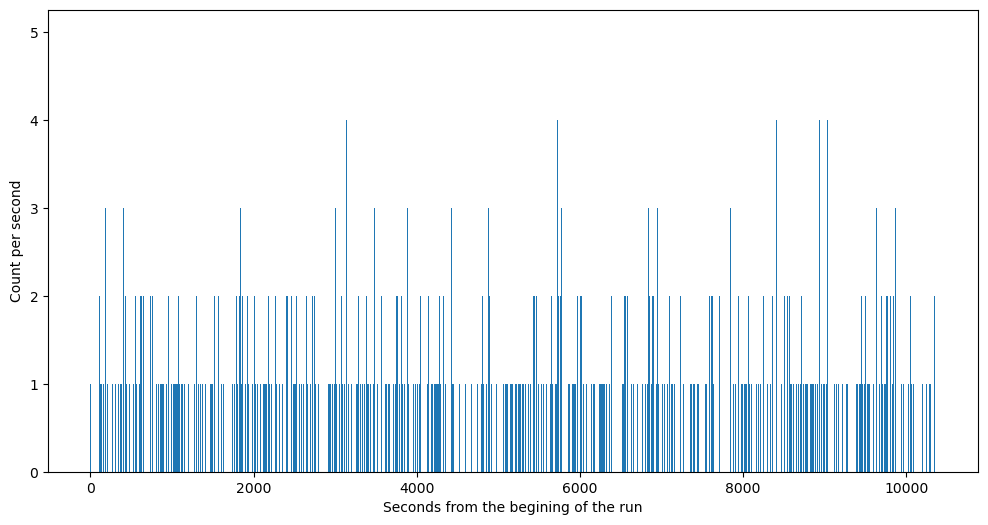

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
bin_contents, bin_edges, patches =plt.hist(rate,bins = 10361, histtype='bar')
#bin_contents, bin_edges, patches =plt.hist(rate, bins = 6832,range=(0,6831))
#bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
ax = plt.gca()
ax.set_ylabel("Count per second")
ax.set_xlabel("Seconds from the begining of the run")

In [12]:
np.mean(bin_contents)

0.5945372068333172

In [13]:
CH0_timestamps_min=CH0_timestamps_sec/60.
CH0_timestamps_min

array([1.14443183e-02, 1.96643036e-02, 2.93411250e-02, ...,
       1.72626883e+02, 1.72635739e+02, 1.72696780e+02])

In [14]:
rate_min_0=np.floor(CH0_timestamps_min)
rate_min_0

array([  0.,   0.,   0., ..., 172., 172., 172.])

Text(0.5, 0, 'Minutes from the begining of the run')

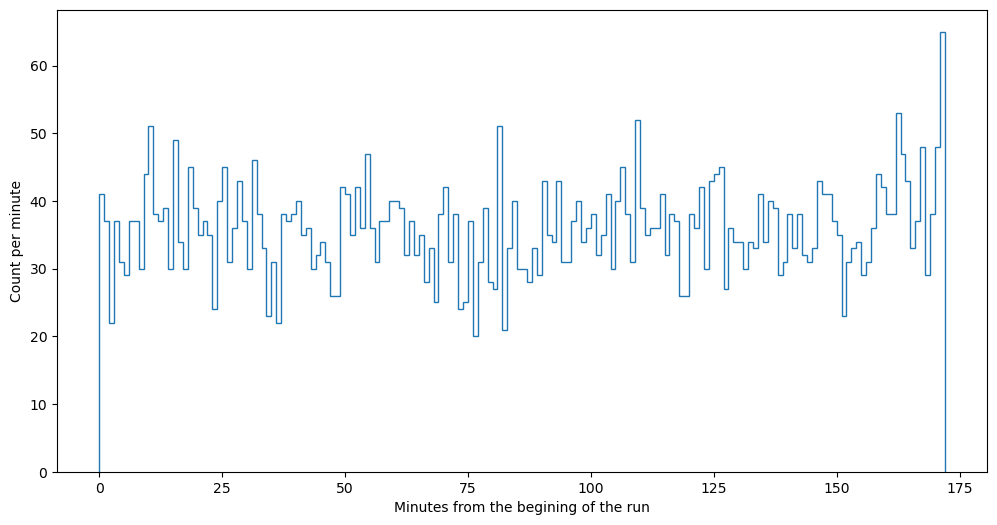

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
bin_contents, bin_edges, patches =plt.hist(rate_min_0,bins = 172, histtype='step')
#bin_contents, bin_edges, patches =plt.hist(rate, bins = 6832,range=(0,6831))
#bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
ax = plt.gca()
ax.set_ylabel("Count per minute")
ax.set_xlabel("Minutes from the begining of the run")

In [16]:
#Open triple ROOT file 
file_path_3 = "/Users/bertabeltran/mist/data/efficiency_test/new_efficiency_sec2_triple/RAW/SDataR_new_efficiency_sec2_triple.root"
file3=uproot.open(file_path_3)
tree3=file3["Data_R"]
print(tree3.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps3 = tree3["Timestamp"].array(library = "np") # picoseconds
channel3 = tree3["Channel"].array(library = "np")
energy3 = tree3["Energy"].array(library = "np")
flags3 = tree3["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags', 'Probe', 'Samples']


In [17]:
#Create masks for channels
CH2_mask = channel3 == 2


#Get timestamps for each channel (time in picoseconds from the begining of the run)
CH2_timestamps = timestamps3[CH2_mask]


#Calculate energy of events on each channel
CH2_energy = energy3[CH2_mask]


#calcuate the time difference between events in chn 0
CH2_time_diff = np.diff(CH2_timestamps)
CH2_time_diff_sec=CH2_time_diff/1e+12 #make it seconds 
CH2_timestamps

array([     431238460000,     1018515229874,     1029975770749, ...,
       10226036066419124, 10231125963416124, 10233294877518811],
      dtype=uint64)

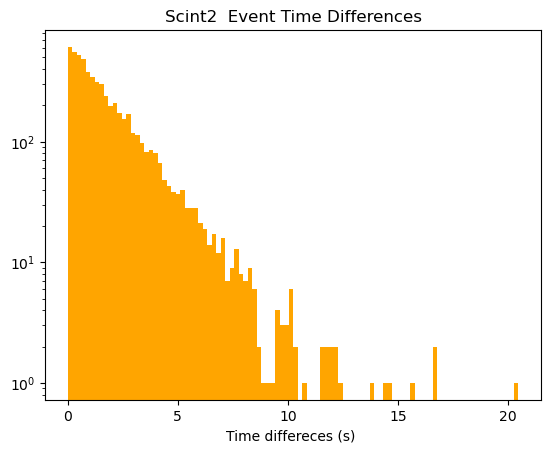

In [18]:
# plot the time differences distribution to see if it looks right 

plt.hist(CH2_time_diff_sec, bins = 100, histtype='stepfilled',color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax=plt.gca()
ax.set_title("Scint2  Event Time Differences")
ax.set_xlabel("Time differeces (s) ")
plt.yscale('log')


plt.show()


Expo function coefficients:
[-313.96322554   15.41419677]
Covariance of coefficients:
[[ 1.46808285e+10 -7.20856720e+08]
 [-7.20856720e+08  3.53954888e+07]]


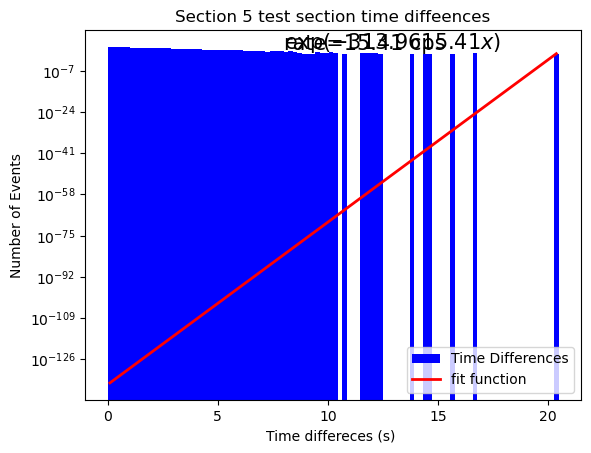

In [19]:
# now I am going to try and fit the time differences plot with curve_fit

import numpy as np
from scipy.optimize import curve_fit
#firts I define the exponential fucntion that I will be fitting 
def expo(x, a, b):
    return  np.exp(a+(b*x))

#here I caculate the bin centers for the fit               
def bincenters(bins):
    return (bins[1:] + bins[:-1]) / 2
                   
# define the histogram that I will be fitting to and return the bin contents and the bid edeges    
bin_cont, bin_edges, patches = plt.hist(CH2_time_diff_sec, bins = 100,histtype='stepfilled' , color ='blue',label ="Time Differences")
                   
# here I do the fit a return the fit values     
param, param_cov = curve_fit(expo, bincenters(bin_edges),bin_cont)
                   
# print the values     
print("Expo function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# now I also want to draw the fitted function on top of the histogram 
fit_func= expo(bincenters(bin_edges),param[0] ,param[1] )
plt.plot(bincenters(bin_edges), fit_func, 'red', linewidth=2, label ="fit function ")       

fit_eq= r"exp$({:.2f} {:.2f}x)$".format(param[0] ,param[1])

ax=plt.gca()
ax.text(8, 100, fit_eq, fontsize=15)
ax.text(8, 40, "rate={:.2f} cps".format(abs(param[1])), fontsize=15)

plt.legend()
plt.yscale('log')
ax.set_title("Section 5 test section time diffeences")
ax.set_xlabel("Time differeces (s) ")
ax.set_ylabel('Number of Events')
plt.show()

In [21]:
CH2_timestamps_sec=CH2_timestamps/1e+12
CH2_timestamps_min=CH2_timestamps_sec/60
rate_min_2=np.floor(CH2_timestamps_min)
rate_min_2

array([  0.,   0.,   0., ..., 170., 170., 170.])

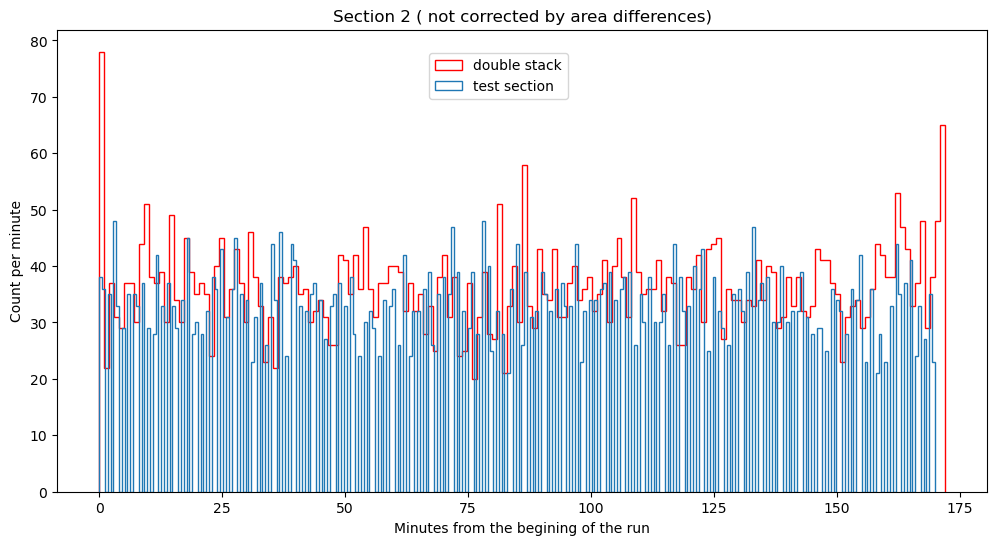

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(rate_min_0,bins = 170, histtype='step',color='red',label='double stack')
bin_contents, bin_edges, patches =plt.hist(rate_min_2,bins = 297, histtype='step',label='test section')

#bin_contents, bin_edges, patches =plt.hist(rate, bins = 6832,range=(0,6831))
#bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
ax = plt.gca()
ax.set_ylabel("Count per minute")
ax.set_xlabel("Minutes from the begining of the run")
plt.title('Section 2 ( not corrected by area differences)')
ax.legend(loc=(0.4, 0.85))


